# Tensorlakehouse openEO: Local Connection

Tensorlakehouse openEO client allows users to apply processes on local data (e.g., netCDF, tif files)
Further info: https://openeo.org/documentation/1.0/python/client-side-processing.html#local-collections

### Setup

1. Create a python virtualenv (python 3.11.7 is the recommended version). 
2. Clone the repository:
```
git clone https://github.com/IBM/tensorlakehouse-openeo-driver.git
``` 

3. Go to
```
cd tensorlakehouse-openeo-driver/tutorials
```

4. Install dependencies:
```
pip install -r tutorial_requirements.txt
```

5. Run jupyter notebook or jupyter lab
```
jupyter lab .
```

In [1]:
import os
from pathlib import Path
import openeo
from openeo.local import LocalConnection
import xarray as xr


In [2]:
# create local connection object
path = Path("./test_data/test_openeo_Globalweather-ERA5-.nc")
assert path.exists()
local_conn = LocalConnection("./")
# set collection variable to the path to the file
collection = "test_data/test_openeo_Globalweather-ERA5-.nc"

# describe collection
local_conn.describe_collection(collection)

{'stac_version': '1.0.0-rc.2',
 'type': 'Collection',
 'id': 'test_data/test_openeo_Globalweather-ERA5-.nc',
 'title': 'test_data/test_openeo_Globalweather-ERA5-.nc',
 'description': '',
 'license': '',
 'providers': [{'name': '', 'roles': ['producer'], 'url': ''}],
 'links': '',
 'extent': {'temporal': {'interval': [['2007-01-07T00:00:00.000000000',
     '2007-02-04T00:00:00.000000000']]}},
 'cube:dimensions': {'t': {'type': 'temporal',
   'extent': ['2007-01-07T00:00:00.000000000',
    '2007-02-04T00:00:00.000000000']},
  'x': {'type': 'spatial',
   'axis': 'x',
   'extent': [-3.773696000000001, 0.28953599999999824]},
  'y': {'type': 'spatial',
   'axis': 'y',
   'extent': [52.67187200000001, 56.73510400000001]},
  'bands': {'type': 'bands', 'values': ['Total precipitation']}}}

### Load collection, select the area of interest and compute temporal aggregation

In [3]:

# set bounding box
west = -3.0
east = 0.0
south = 53.0
north = 56.0
# load_collection instantiates the datacube object
datacube = local_conn.load_collection(collection_id=collection)
# select the area of interest
datacube = datacube.filter_bbox(west=west, east=east, south=south, north=north)
# compute temporal aggregation by select t dimension (which is the temporal dimension) and mean as a reducer function 
datacube = datacube.reduce_dimension(reducer="mean", dimension="t")
# call execute() method to run all processes
array = datacube.execute()
array

<xarray.DataArray (bands: 1, y: 23, x: 23)>
dask.array<mean_agg-aggregate, shape=(1, 23, 23), dtype=float64, chunksize=(1, 23, 23), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 55.95 55.82 55.69 55.56 ... 53.46 53.33 53.2 53.07
  * x            (x) float64 -2.987 -2.856 -2.725 ... -0.3658 -0.2348 -0.1037
    spatial_ref  int64 ...
  * bands        (bands) object 'Total precipitation'
Attributes:
    grid_type:                      pairs
    resolution_level:               12
    reduced_dimensions_min_values:  {'t': numpy.datetime64('2007-01-07T00:00:...

### Plotting the result

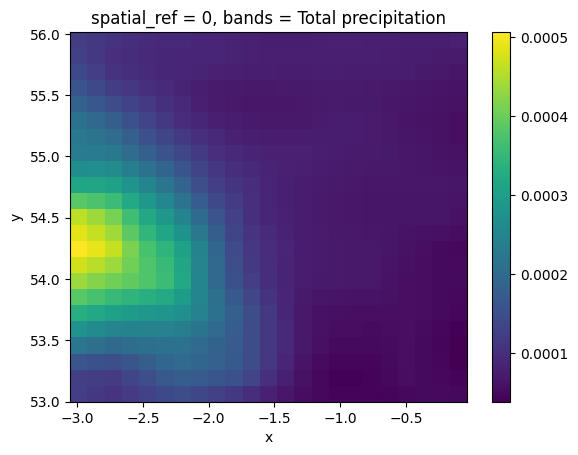

In [4]:
array.isel(bands=0).plot()